In [1]:
# Importação das Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configuração de Visualização
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# 2. Baixar o dataset MovieLens 100k
!wget -O ml-100k.zip https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -o ml-100k.zip

# Verificar se os arquivos foram extraídos
!ls ml-100k/

--2025-11-15 19:24:09--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  20.5MB/s    in 0.2s    

2025-11-15 19:24:10 (20.5 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [3]:
# Ler os dados
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=columns, encoding='latin-1')

# Verificar
print(ratings.head())
print(f"\nShape: {ratings.shape}")
print(f"Usuários únicos: {ratings['user_id'].nunique()}")
print(f"Filmes únicos: {ratings['item_id'].nunique()}")

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Shape: (100000, 4)
Usuários únicos: 943
Filmes únicos: 1682


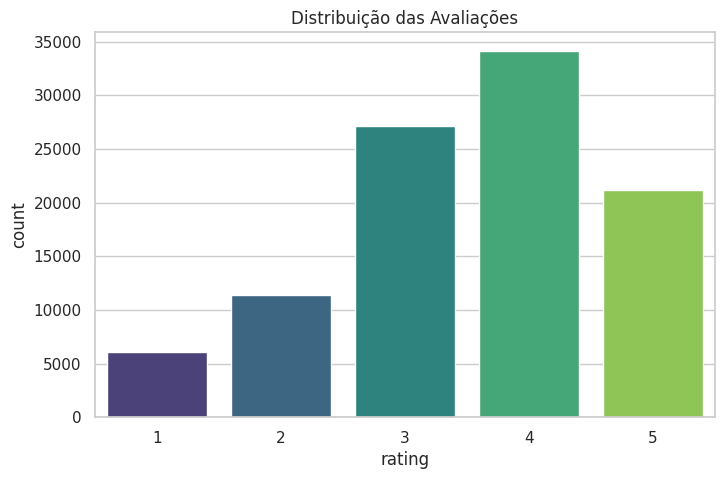

Top 10 filmes mais avaliados:
item_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: count, dtype: int64


In [4]:
# Distribuição das avaliações
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribuição das Avaliações')
plt.show()

# Filmes mais avaliados
top_movies = ratings['item_id'].value_counts().head(10)
print("Top 10 filmes mais avaliados:")
print(top_movies)

In [5]:
# Criar matriz de utilidade (Usuário x Item)

utility_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating')
utility_matrix = utility_matrix.fillna(0)

print(f"Matriz de utilidade: {utility_matrix.shape}")
print(f"Esparsidade: {1 - ratings.shape[0] / (utility_matrix.shape[0] * utility_matrix.shape[1]):.4f}")

Matriz de utilidade: (943, 1682)
Esparsidade: 0.9370
